In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
languages = pd.read_csv(r"C:\Users\chrin\Desktop\Visualizzazione\Dataset\languages.csv")
#languages = pd.read_csv(r"C:\Users\chris\OneDrive\Desktop\Visualizzazione\Dataset\languages.csv")


In [4]:
languages_nUsers = {}

for i in languages.index:
    id = languages['pldb_id'][i]
    nUsers = languages['number_of_users'][i]
    languages_nUsers[id] = nUsers

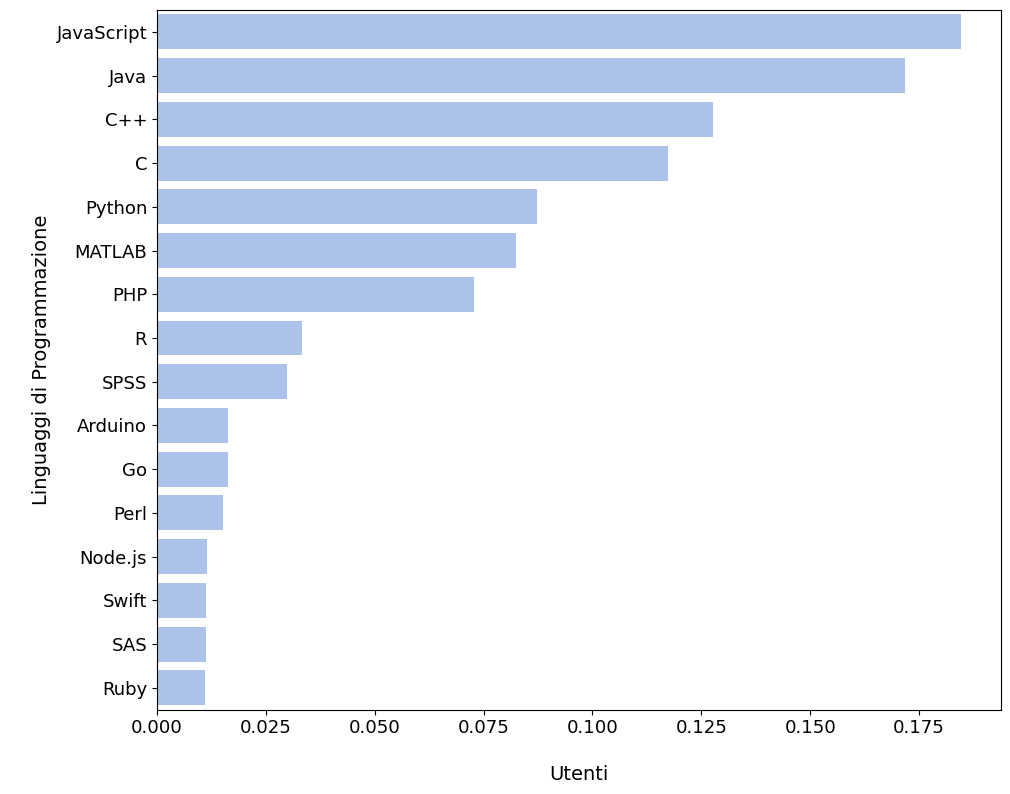

In [5]:
#linguaggi di programmazione(solo type=pl) - numero utenti; ordine decrescente

languages_top = languages[languages['type'] == 'pl'].sort_values(by='number_of_users',ascending=False).head(16)
""" languages_top = languages.sort_values(by='number_of_users',ascending=False).head(20) """
for i in languages_top.index:
    if languages_top['title'][i] == 'Arduino Programming Language':
        languages_top['title'][i] = 'Arduino'

languages_top['normalized_users'] = languages_top['number_of_users'] / languages_top['number_of_users'].sum()

fig = plt.figure(figsize=(10,8))
""" fig.set_facecolor('#e3e7f0') """
""" ax = plt.axes()
ax.set_facecolor('k') """
sns.barplot(x='normalized_users', y='title', data=languages_top,palette=['#6495ED'],alpha=0.6)
plt.xlabel('\nUtenti',fontsize=14)
plt.ylabel('\nLinguaggi di Programmazione',fontsize=14)
""" plt.title('Popolarità Linguaggi di Programmazione per numero di utenti',fontsize=18,pad=20) """
plt.tight_layout()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

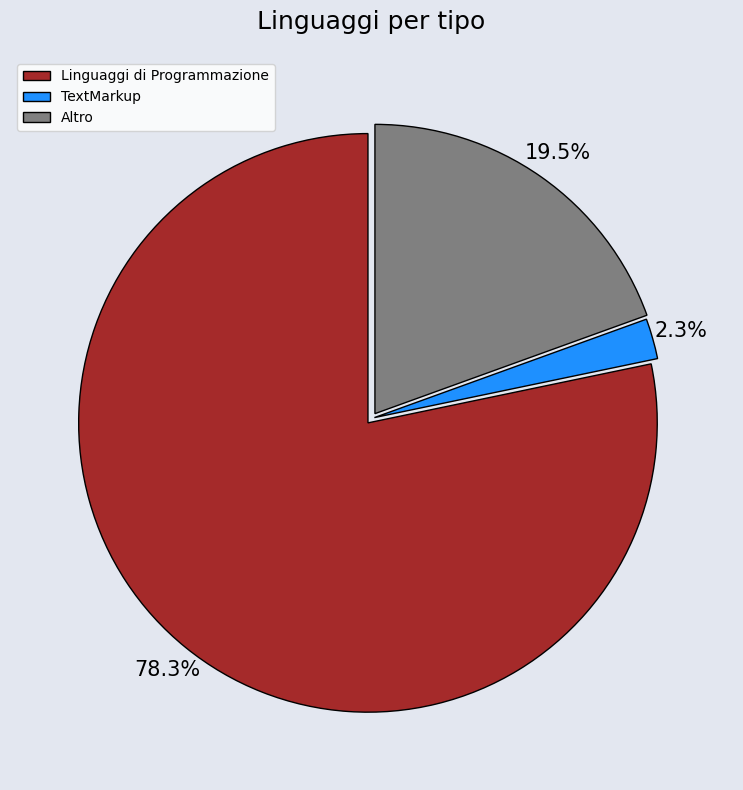

In [6]:
#linguaggi per tipo
colors = ['#a52a2a', '#1E90FF', 'gray']

type_counts = languages['type'].value_counts()
top_2_types = type_counts.head(2)
others = type_counts[2:].sum()
top_2_types['Other'] = others

labels = ['Linguaggi di Programmazione','TextMarkup','Altro']

fig = plt.figure(figsize=(18,8))
fig.set_facecolor('#e3e7f0')
plt.pie(top_2_types, labels=None, autopct='%1.1f%%', colors=colors, startangle=90,textprops={'fontsize':15,'color':'black'},explode=[0.02,0.01,0.02],rotatelabels=True,pctdistance=1.1,wedgeprops = {"edgecolor" : "black"})
plt.title('Linguaggi per tipo',color='k',fontsize=18,pad=20)
plt.tight_layout()
plt.legend(labels,fontsize=10,loc='upper left')

plt.show()

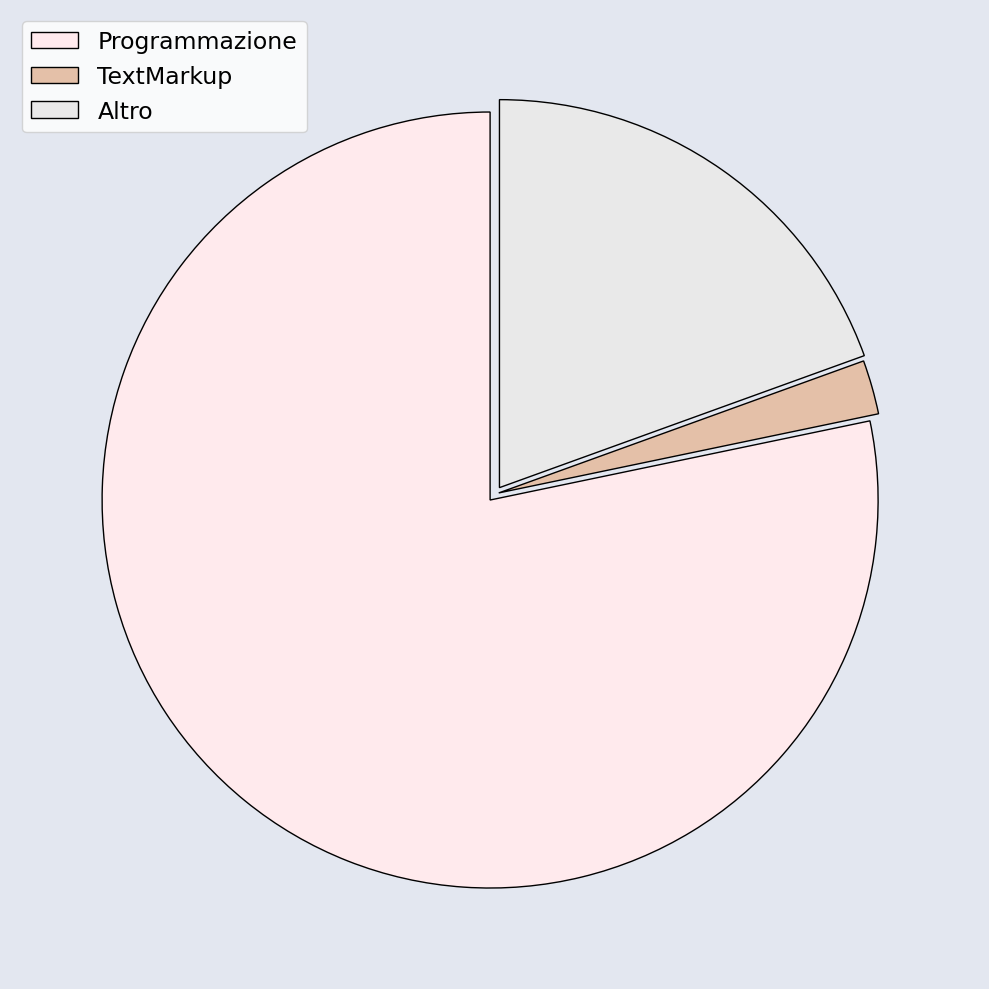

In [7]:
#linguaggi per tipo
colors = ['#ffeaed', '#e4c0a8', '#e9e9e9']

type_counts = languages['type'].value_counts()
top_2_types = type_counts.head(2)
others = type_counts[2:].sum()
top_2_types['Other'] = others

labels = ['Programmazione','TextMarkup','Altro']

fig = plt.figure(figsize=(18,10))
fig.set_facecolor('#e3e7f0')
plt.pie(top_2_types, labels=None, colors=colors, startangle=90,textprops={'fontsize':15,'color':'black'},explode=[0.02,0.01,0.02],rotatelabels=True,pctdistance=1.1,wedgeprops = {"edgecolor" : "black"})
""" plt.title('Linguaggi per tipo',color='k',fontsize=18,pad=20) """
plt.tight_layout()
plt.legend(labels,fontsize=17,loc='upper left')

plt.show()

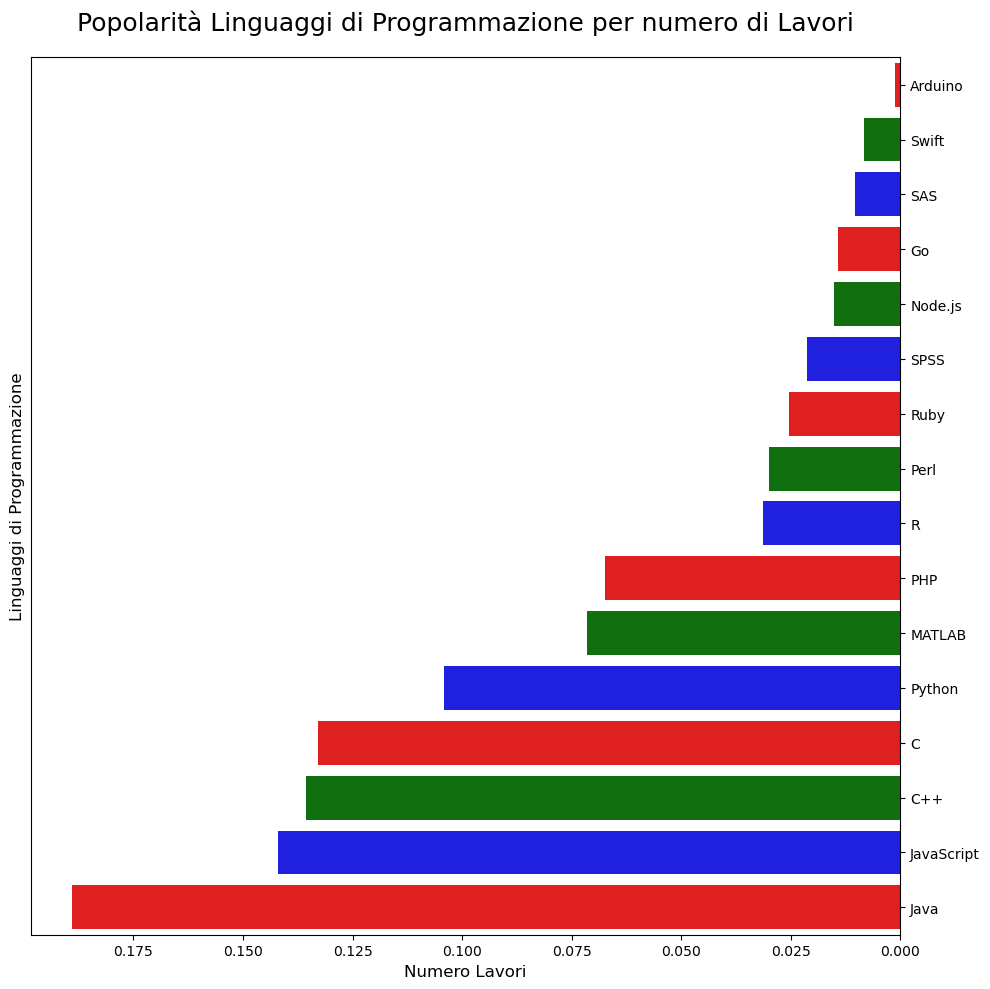

In [8]:
#linguaggi - numero lavori (riprendo i linguaggi solo di due grafici sopra)
languages_top_jobs = languages_top.sort_values(by='number_of_jobs')

languages_top_jobs['normalized_jobs'] = languages_top['number_of_jobs'] / languages_top['number_of_jobs'].sum()

plt.figure(figsize=(10,10))
ax = sns.barplot(x='normalized_jobs', y='title', data=languages_top_jobs,palette=['r','g','b'])
ax.invert_xaxis()
ax.yaxis.tick_right()
plt.xlabel('Numero Lavori',fontsize=12)
plt.ylabel('Linguaggi di Programmazione',fontsize=12)
plt.title('Popolarità Linguaggi di Programmazione per numero di Lavori',fontsize=18,pad=20)
plt.tight_layout()
plt.show()

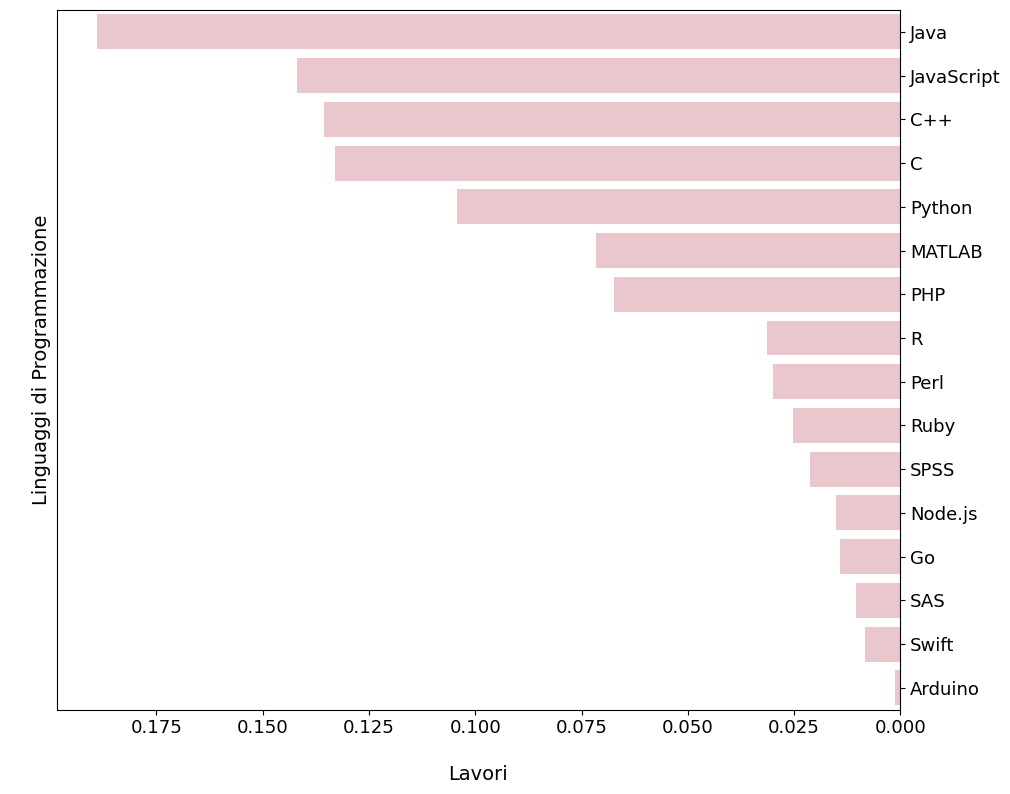

In [9]:
#linguaggi - numero lavori (riprendo i linguaggi solo di due grafici sopra)
languages_top_jobs = languages_top.sort_values(by='number_of_jobs',ascending=False)

languages_top_jobs['normalized_jobs'] = languages_top['number_of_jobs'] / languages_top['number_of_jobs'].sum()

plt.figure(figsize=(10,8))
ax = sns.barplot(x='normalized_jobs', y='title', data=languages_top_jobs,palette=['#E799A3'],alpha=0.6)
""" ax.invert_xaxis() """
""" ax.yaxis.tick_right() """
plt.xlabel('\nLavori',fontsize=14)
plt.ylabel('\nLinguaggi di Programmazione',fontsize=14)
""" plt.title('Popolarità Linguaggi di Programmazione per numero di Lavori',fontsize=18,pad=20) """
plt.tight_layout()
ax.invert_xaxis()
ax.yaxis.tick_right()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

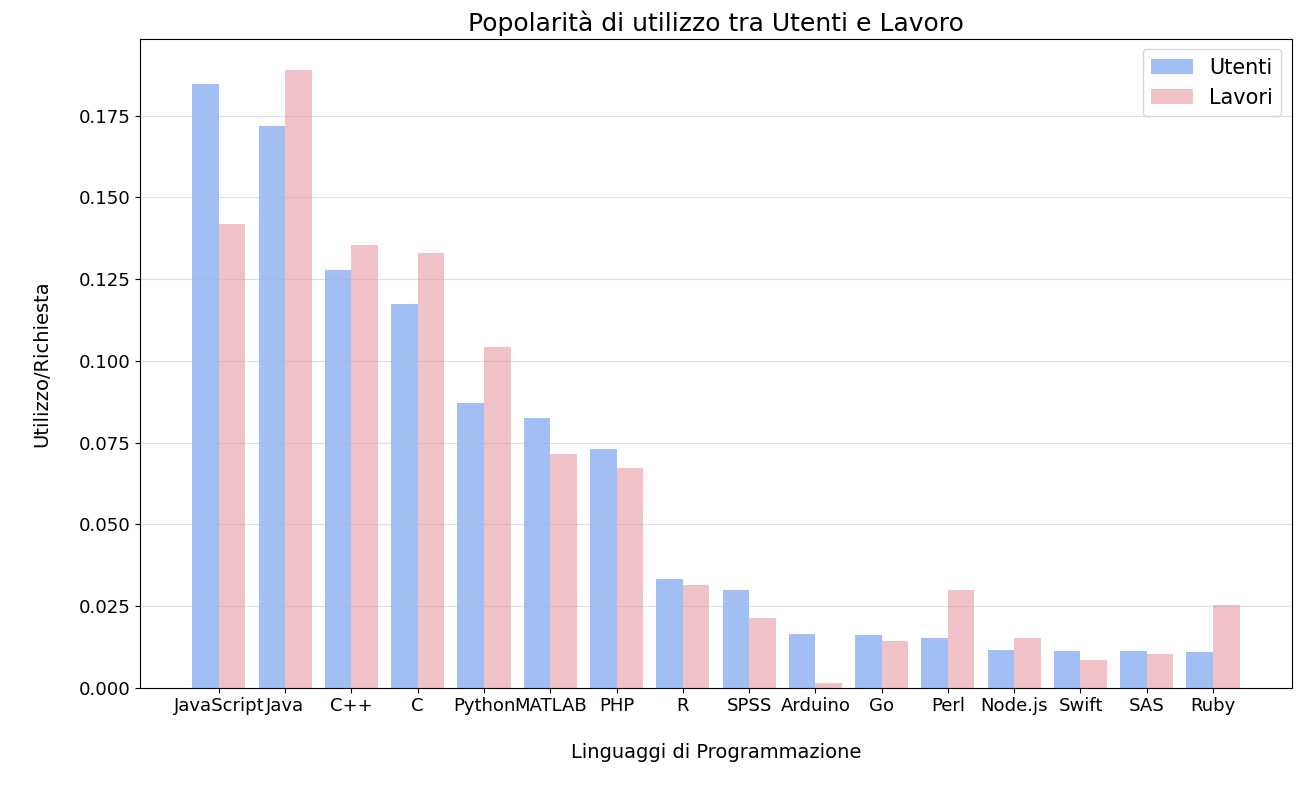

In [10]:
#linguaggi - numero_utenti/numero_lavori (grafico unico a barre per il confronto)
new_languages_top = languages_top

languages_top['normalized_jobs'] = languages_top['number_of_jobs'] / languages_top['number_of_jobs'].sum()

for i in new_languages_top.index:
    if new_languages_top['title'][i] == 'PowerShell':
        new_languages_top['title'][i] = 'PS'
        break

title = list(new_languages_top['title'])
nUsers = list(languages_top['normalized_users'])
nJobs = list(languages_top['normalized_jobs'])

#posizioni barre asse x
bar_width = 0.4
pos_users = np.arange(len(title))
pos_jobs = pos_users + bar_width

plt.figure(figsize=(13,8))
plt.bar(pos_users,nUsers,width=bar_width,label='Utenti',linewidth=1,color='#6495ED',alpha=0.6)
plt.bar(pos_jobs,nJobs,width=bar_width,label='Lavori',linewidth=1,color='#E799A3',alpha=0.6)

# Aggiungere etichette e legenda
plt.xlabel('\nLinguaggi di Programmazione\n',fontsize=14)
plt.ylabel('\nUtilizzo/Richiesta\n',fontsize=14)
plt.title('Popolarità di utilizzo tra Utenti e Lavoro',fontsize=18)
plt.xticks(pos_users + bar_width / 2, title)  # Imposta le etichette sull'asse x
plt.grid(alpha=0.4,axis='y')
plt.legend(fontsize=15)
plt.tight_layout()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

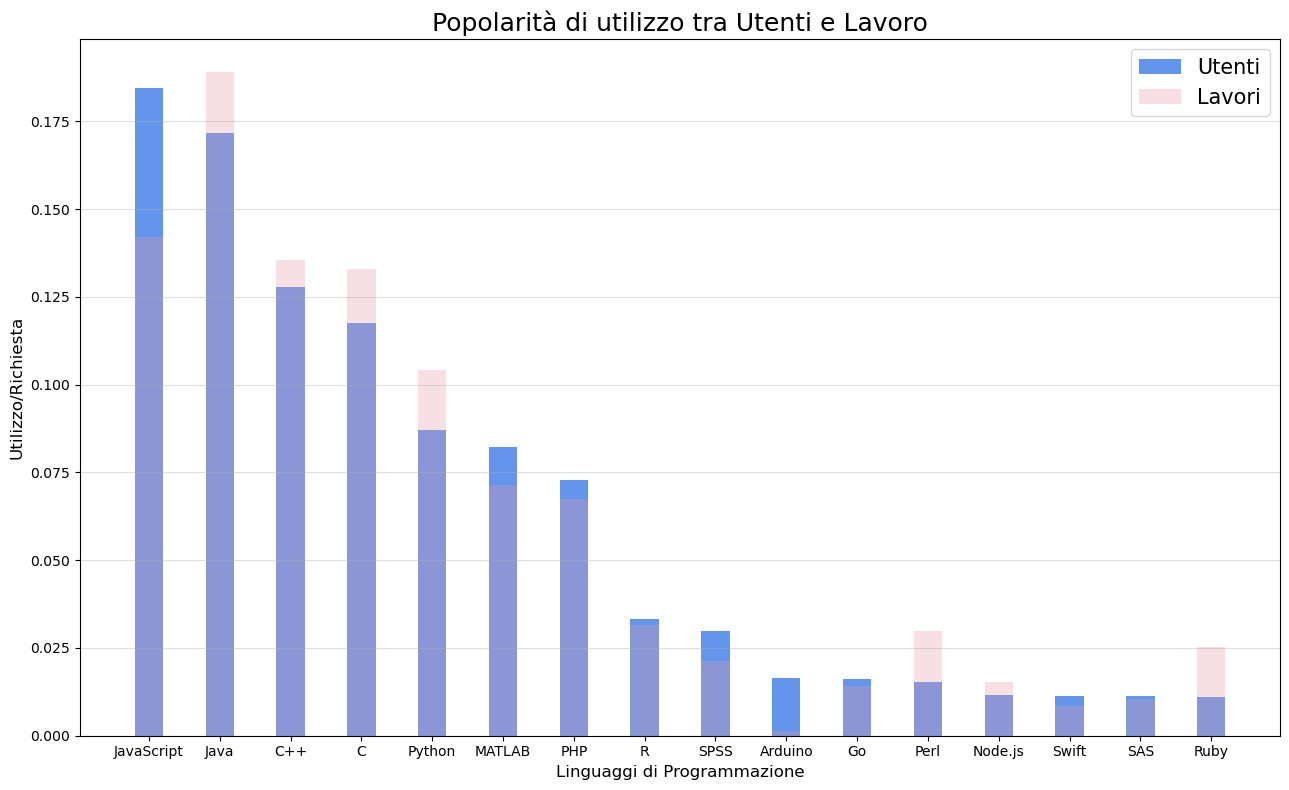

In [11]:
#linguaggi - numero_utenti/numero_lavori (grafico unico a barre per il confronto)
new_languages_top = languages_top

languages_top['normalized_jobs'] = languages_top['number_of_jobs'] / languages_top['number_of_jobs'].sum()

for i in new_languages_top.index:
    if new_languages_top['title'][i] == 'PowerShell':
        new_languages_top['title'][i] = 'PS'
        break

title = list(new_languages_top['title'])
nUsers = list(languages_top['normalized_users'])
nJobs = list(languages_top['normalized_jobs'])

#posizioni barre asse x
bar_width = 0.4
pos_users = np.arange(len(title))
pos_jobs = pos_users

plt.figure(figsize=(13,8))
plt.bar(pos_users,nUsers,width=bar_width,label='Utenti',linewidth=4,color='#6495ED')
plt.bar(pos_jobs,nJobs,width=bar_width,label='Lavori',linewidth=4,color='#E799A3',alpha=0.3)

# Aggiungere etichette e legenda
plt.xlabel('Linguaggi di Programmazione',fontsize=12)
plt.ylabel('Utilizzo/Richiesta',fontsize=12)
plt.title('Popolarità di utilizzo tra Utenti e Lavoro',fontsize=18)
plt.xticks(pos_users, title) # Imposta le etichette sull'asse x
plt.grid(alpha=0.4,axis='y')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

JavaScript


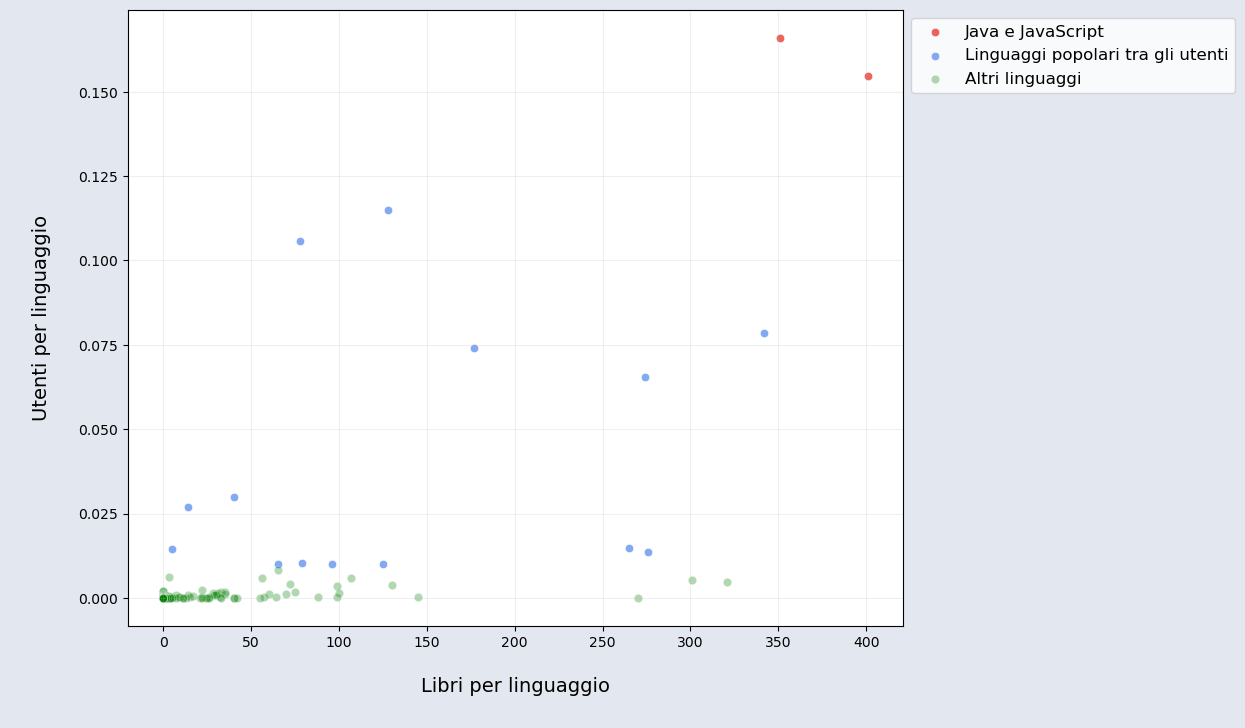

In [12]:
#per aggiungere una colonna nuova dentro la variabile languages_top con il comando pd.series per i valori di tipo (procedurale,...) e creare un nuovo grafico

languages_top_200 = languages[languages['type'] == 'pl'].sort_values(by='number_of_users',ascending=False).head(200)
for i in languages_top_200.index:
    if languages_top_200['title'][i] == 'Arduino Programming Language':
        languages_top_200['title'][i] = 'Arduino'

languages_top_200['normalized_users'] = languages_top_200['number_of_users'] / languages_top_200['number_of_users'].sum()

fig = plt.figure(figsize=(10,8))
fig.set_facecolor('#e3e7f0')
#print(languages_top_200['title'][0],languages_top_200['title'][1])
print(languages_top_200['title'][1] )
sns.scatterplot(x='book_count',y='normalized_users',data=languages_top_200[:2],color='#E42217',alpha=0.7 ,label='Java e JavaScript')
sns.scatterplot(x='book_count',y='normalized_users',data=languages_top_200[2:16],color='#6495ED',alpha=0.8 ,label='Linguaggi popolari tra gli utenti')
sns.scatterplot(x='book_count',y='normalized_users',data=languages_top_200[16:],color='g',alpha=0.3 ,label='Altri linguaggi')
""" plt.title('Libri linguaggi di programmazione per Utenti',fontsize=18,pad=20) """
plt.xlabel('\nLibri per linguaggio\n',fontsize=14)
plt.ylabel('\nUtenti per linguaggio\n',fontsize=14)
plt.grid(alpha=0.2)
plt.legend(fontsize=12,bbox_to_anchor=(1, 1))
plt.show()

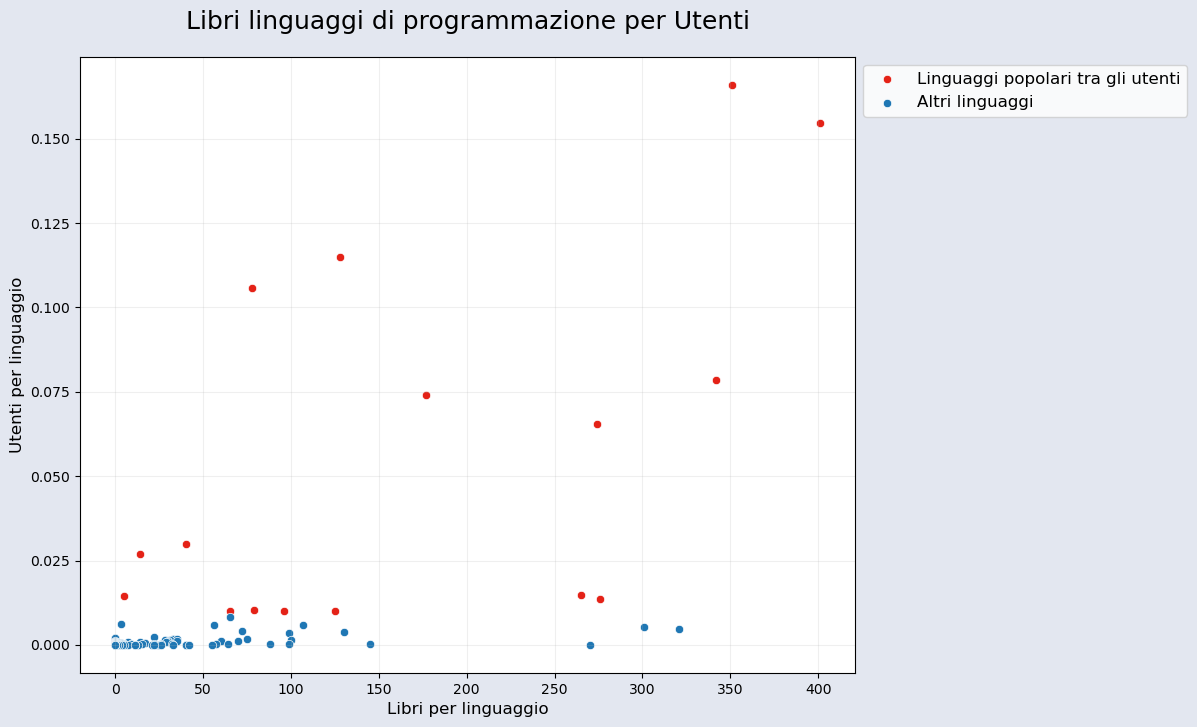

In [13]:
#per aggiungere una colonna nuova dentro la variabile languages_top con il comando pd.series per i valori di tipo (procedurale,...) e creare un nuovo grafico

languages_top_200 = languages[languages['type'] == 'pl'].sort_values(by='number_of_users',ascending=False).head(200)
for i in languages_top_200.index:
    if languages_top_200['title'][i] == 'Arduino Programming Language':
        languages_top_200['title'][i] = 'Arduino'

languages_top_200['normalized_users'] = languages_top_200['number_of_users'] / languages_top_200['number_of_users'].sum()

fig = plt.figure(figsize=(10,8))
fig.set_facecolor('#e3e7f0')
sns.scatterplot(x='book_count',y='normalized_users',data=languages_top_200[:16],color='#E42217',label='Linguaggi popolari tra gli utenti')
sns.scatterplot(x='book_count',y='normalized_users',data=languages_top_200[16:],label='Altri linguaggi')
plt.title('Libri linguaggi di programmazione per Utenti',fontsize=18,pad=20)
plt.xlabel('Libri per linguaggio',fontsize=12)
plt.ylabel('Utenti per linguaggio',fontsize=12)
plt.grid(alpha=0.2)
plt.legend(fontsize=12,bbox_to_anchor=(1, 1))
plt.show()

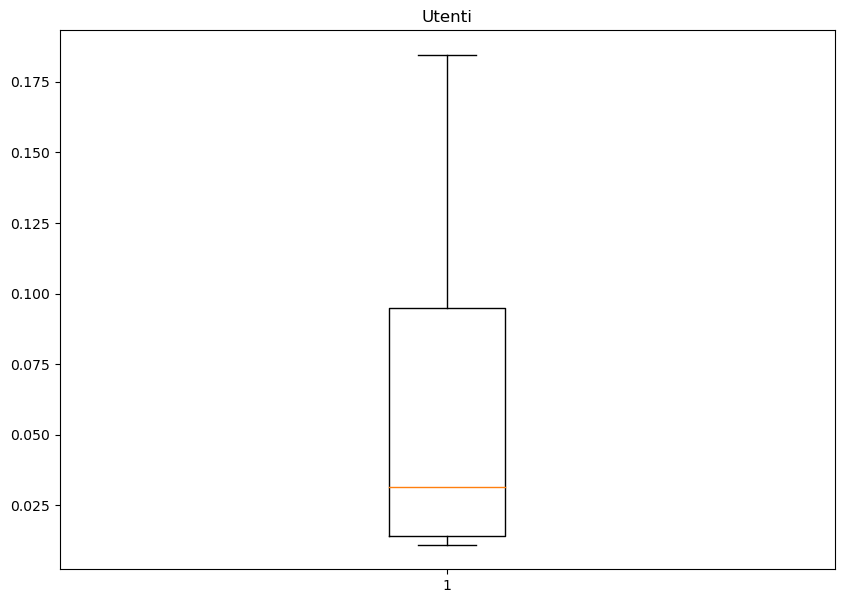

In [14]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(languages_top['normalized_users'])
""" plt.boxplot(languages_top['normalized_jobs']) """

""" all = languages
all['normalized_users'] = all['number_of_users'] / all['number_of_users'].sum()
plt.boxplot(all['normalized_users']) """

plt.title('Utenti')
 
# show plot
plt.show()

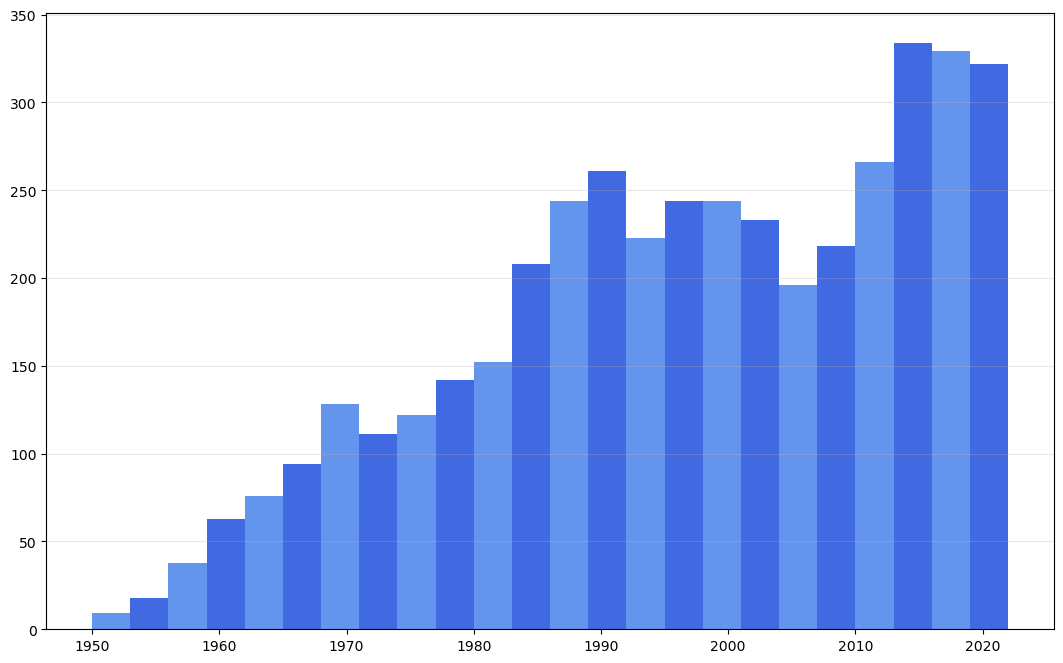

In [15]:
bins = np.arange(1950,2023,3)
col = list()
for i in range (len(bins)):
    if i % 2 == 0:
        col.append('cornflowerblue')
    else:
        col.append('royalblue')
plt.figure(figsize = (13,8))
n,bins, patches = plt.hist(languages.appeared, bins = bins)
for patch, colore in zip(patches,col):
    patch.set_facecolor(colore)
plt.grid(alpha = 0.3, axis = 'y')
plt.show()

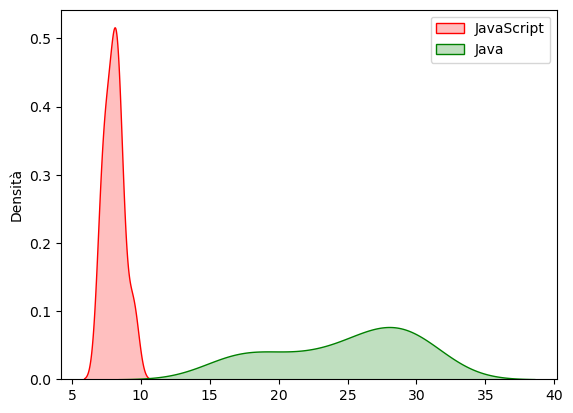

In [16]:
#density plot
#Poplanguages = pd.read_csv(r"C:\Users\chris\OneDrive\Desktop\Visualizzazione\Dataset\Popularity of Programming Languages from 2004 to 2023.csv")
Poplanguages = pd.read_csv(r"C:\Users\chrin\Desktop\Visualizzazione\Dataset\Popularity of Programming Languages from 2004 to 2023.csv")

#dataset values extraction
languages_map = {}
for col in Poplanguages.columns:
    if col != 'Date':
        languages_map[col] = {}

for i in Poplanguages.index:
    date = Poplanguages['Date'][i]
    date_splitted = date.split()
    year = date_splitted[1]

    for l in languages_map:
        if year in languages_map[l]:
            languages_map[l][year].append(Poplanguages[l][i]) 
        else:
            languages_map[l][year] = [Poplanguages[l][i]]

#javascript values extraction
js_map = {}
for year in languages_map['JavaScript']:
    values = languages_map['JavaScript'][year]
    js_map[year] = np.sum(values) / len(values)

#java values extraction
jv_map = {}
for year in languages_map['Java']:
    values = languages_map['Java'][year]
    jv_map[year] = np.sum(values) / len(values)

sns.kdeplot(js_map,color='r',fill=True,label='JavaScript')
sns.kdeplot(jv_map,color='g',fill=True,label='Java')
plt.xlabel('')
plt.ylabel('Densità')
plt.legend()



plt.show()


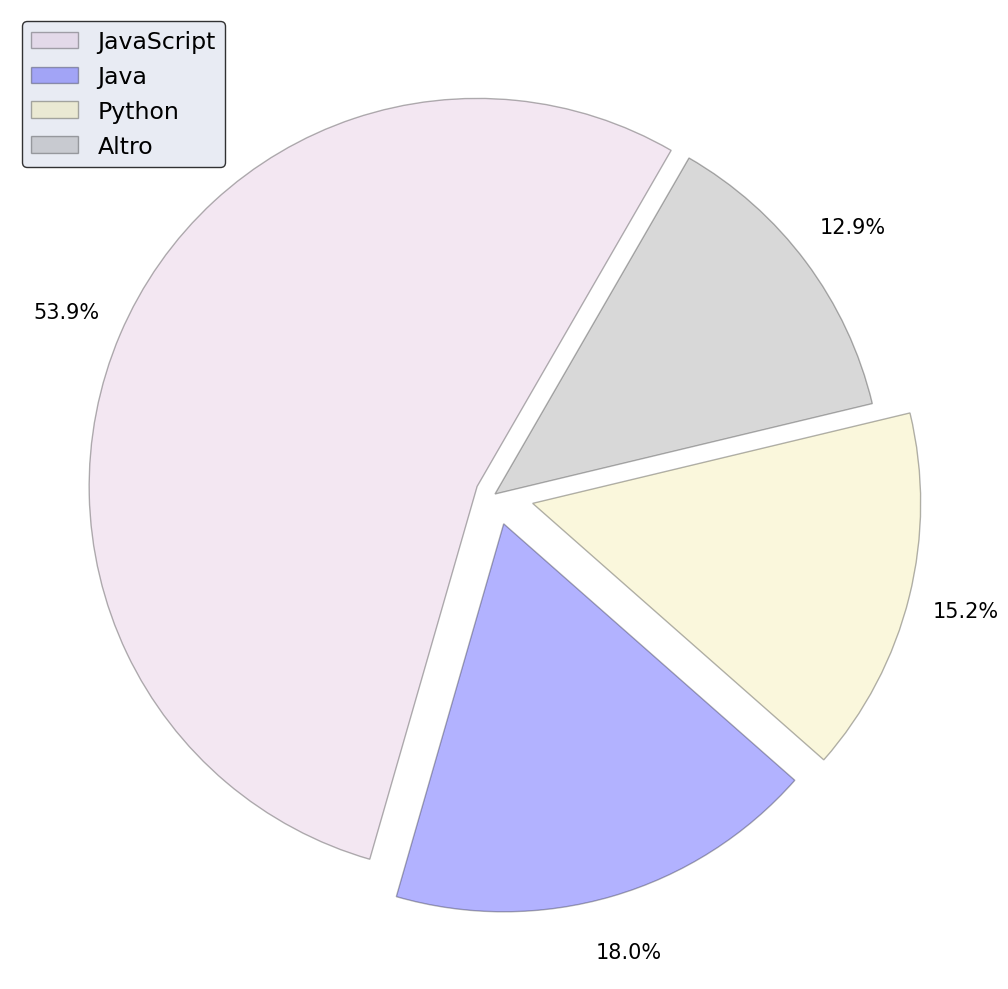

In [36]:
#Most Popular GitHub Projects
#popular_project = pd.read_csv(r"C:\Users\chris\OneDrive\Desktop\Visualizzazione\Dataset\Domains_of_5000_GitHub_Repositories_-_Public_-_Domains.csv")
popular_project = pd.read_csv(r"C:\Users\chrin\Desktop\Visualizzazione\Dataset\Domains_of_5000_GitHub_Repositories_-_Public_-_Domains.csv")

#linguaggi per tipo
colors = ['#d8b1d4', 'b','khaki', 'gray']

#grafico a torta
""" print(popular_project.columns) """
pie_values = popular_project['Language'].value_counts()
""" print(pie_values) """
top_3_pl = pie_values.head(4)
others = pie_values[4:].sum()

labels = ['JavaScript','Java','Python','Altro']

fig = plt.figure(figsize=(18,10))
""" fig.set_facecolor('#e3e7f0') """
plt.pie(top_3_pl, labels=None, autopct='%1.1f%%', colors=colors, startangle=60,textprops={'fontsize':15,'color':'black'},explode=[0.05,0.08,0.1,0],rotatelabels=True,pctdistance=1.15,wedgeprops={'linewidth':1,'edgecolor':'k','alpha': 0.3})
""" plt.title('Linguaggi per progetti più popolari di Github',color='k',fontsize=18,pad=20) """
plt.tight_layout()
plt.legend(labels,fontsize=17,loc='upper left',facecolor='#e3e7f0',edgecolor='k')
plt.show()


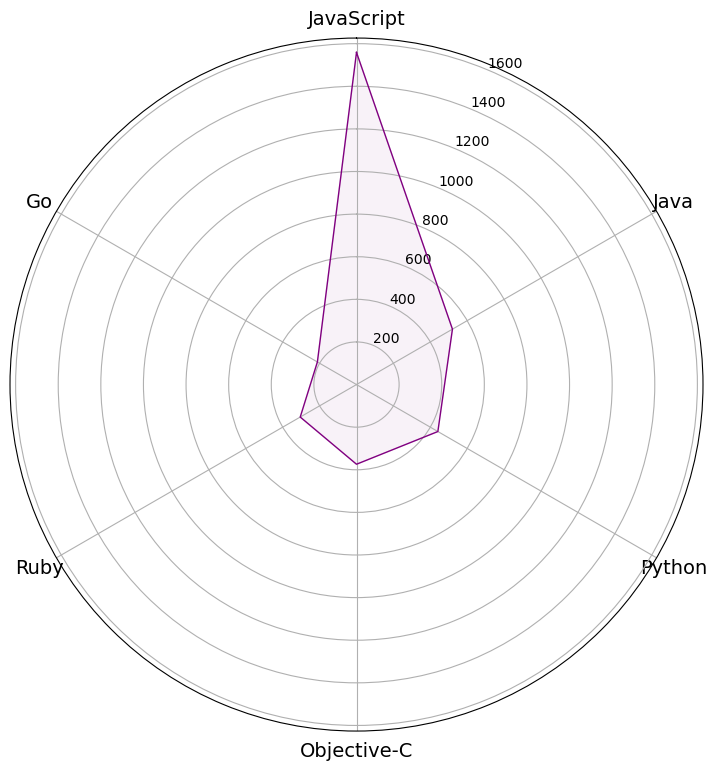

In [18]:

labels = popular_project['Language'].value_counts().head(6).index.tolist() #['JavaScript', 'Java', 'Python', 'Objective-C', 'Ruby']

values = popular_project['Language'].value_counts().head(6).values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
""" fig.set_facecolor('#e3e7f0') """
# Draw the outline of our data.
ax.plot(angles, values, color='purple', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='purple', alpha=0.05)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels,fontsize=14)
""" plt.title('Linguaggi per progetti più popolari di Github',fontsize=18,pad=20,color='b') """

plt.show()

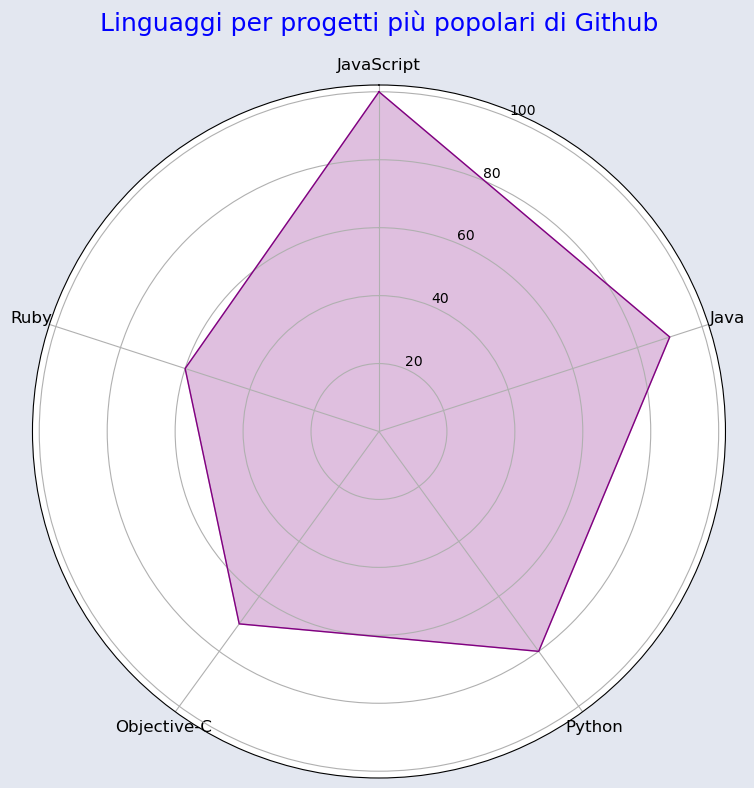

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dati di esempio
popular_project = pd.DataFrame({
    'Language': ['JavaScript', 'Java', 'Python', 'Objective-C', 'Ruby'],
    'Count': [100, 90, 80, 70, 60]
})

labels = popular_project['Language'].tolist()
values = popular_project['Count'].tolist()

# Numero di variabili nel nostro grafico polare.
num_vars = len(labels)

# Suddividere il cerchio in parti uguali e salvare gli angoli
# per sapere dove posizionare ciascun asse.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Il grafico è un cerchio, quindi dobbiamo "completare il giro"
# e aggiungere il valore iniziale alla fine.
values += values[:1]
angles += angles[:1]

# Creazione del grafico polare
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
fig.set_facecolor('#e3e7f0')

# Disegnare il contorno dei nostri dati.
ax.plot(angles, values, color='purple', linewidth=1)

# Riempirlo.
ax.fill(angles, values, color='purple', alpha=0.25)

# Fissare l'asse in modo che segua l'ordine corretto e inizi alle 12 in punto.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Impostare la dimensione delle etichette sull'asse x (angoli)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)  # Imposta la dimensione delle etichette qui

# Titolo del grafico
plt.title('Linguaggi per progetti più popolari di Github', fontsize=18, pad=20, color='b')

# Mostrare il grafico
plt.show()


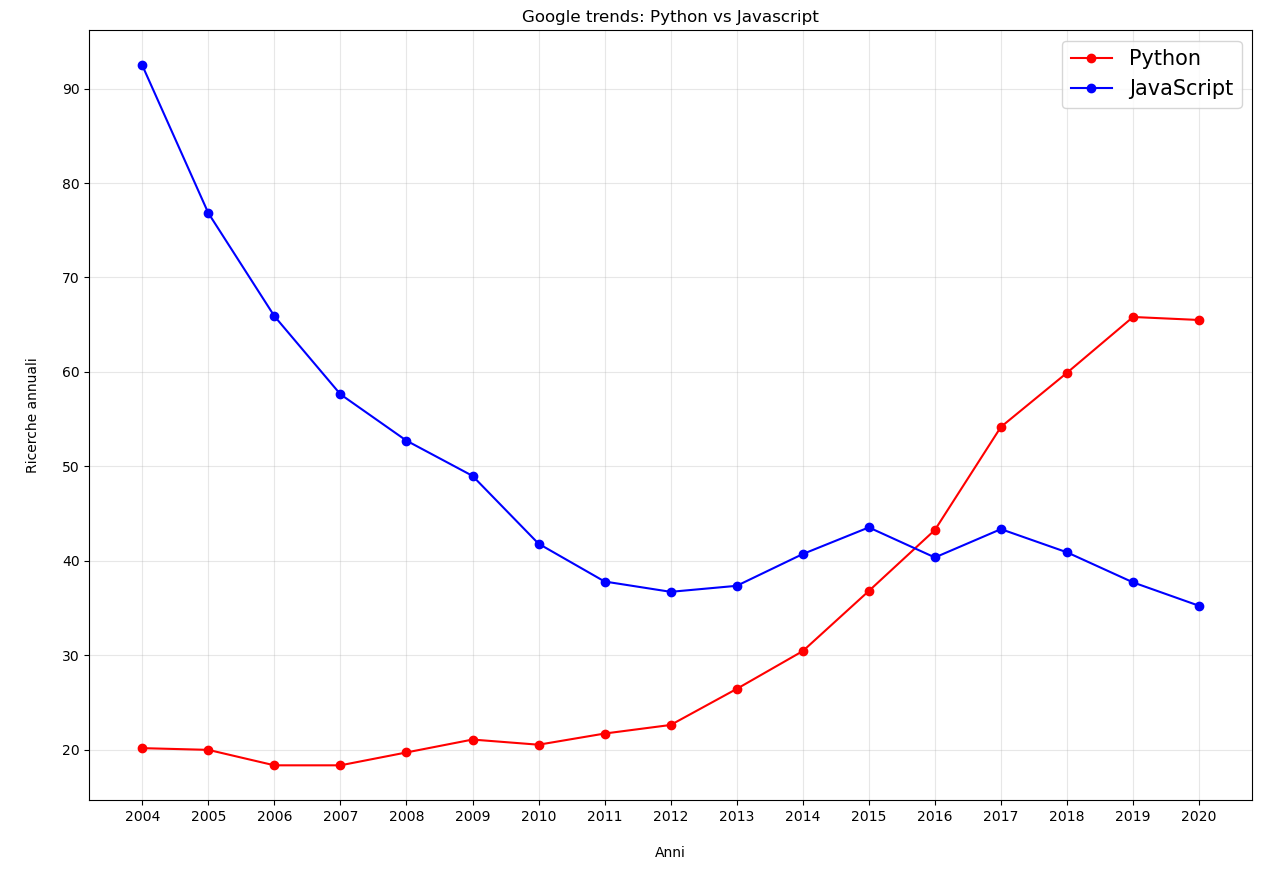

In [20]:
#google trends python-javascript 2004-2020
#Google Trends è un servizio fornito da Google che consente di esplorare e analizzare la popolarità relativa di determinate query di ricerca su Google nel tempo.
#Questo strumento offre informazioni sul volume di ricerca di specifiche parole chiave o frasi nel motore di ricerca Google. 

#pyVSjs = pd.read_csv(r"C:\Users\chris\OneDrive\Desktop\Visualizzazione\Dataset\google-trends-2004-2020.csv")
pyVSjs = pd.read_csv(r"C:\Users\chrin\Desktop\Visualizzazione\Dataset\google-trends-2004-2020.csv")

#grafico a linee con marker = 'o'"Estrazione dati csv.ipynb"
python_values = pyVSjs['Python']
js_values = pyVSjs['JavaScript']
py_years_values = {}
js_years_values = {}

for i in pyVSjs.index:
    date = pyVSjs['Week'][i]
    date_splitted = date.split('-')
    year = date_splitted[0]

    #py
    if year in py_years_values:
        py_years_values[year].append(pyVSjs['Python'][i])
    else:
        py_years_values[year] = []

    #js
    if year in js_years_values:
        js_years_values[year].append(pyVSjs['JavaScript'][i])
    else:
        js_years_values[year] = []

py_mean = []
for year in py_years_values:
    py_mean.append(np.sum(py_years_values[year])/len(py_years_values[year]))

js_mean = []
for year in js_years_values:
    js_mean.append(np.sum(js_years_values[year])/len(js_years_values[year]))

plt.figure(figsize=(15,10))
plt.plot(py_years_values.keys(), py_mean, linestyle='-', color='r',label='Python',marker='o')
plt.plot(js_years_values.keys(), js_mean, linestyle='-', color='b',label='JavaScript',marker='o')
plt.legend(fontsize=15)
plt.title('Google trends: Python vs Javascript')
plt.xlabel('\nAnni\n')
plt.ylabel('\nRicerche annuali\n')
plt.grid(alpha=0.3)

plt.show()


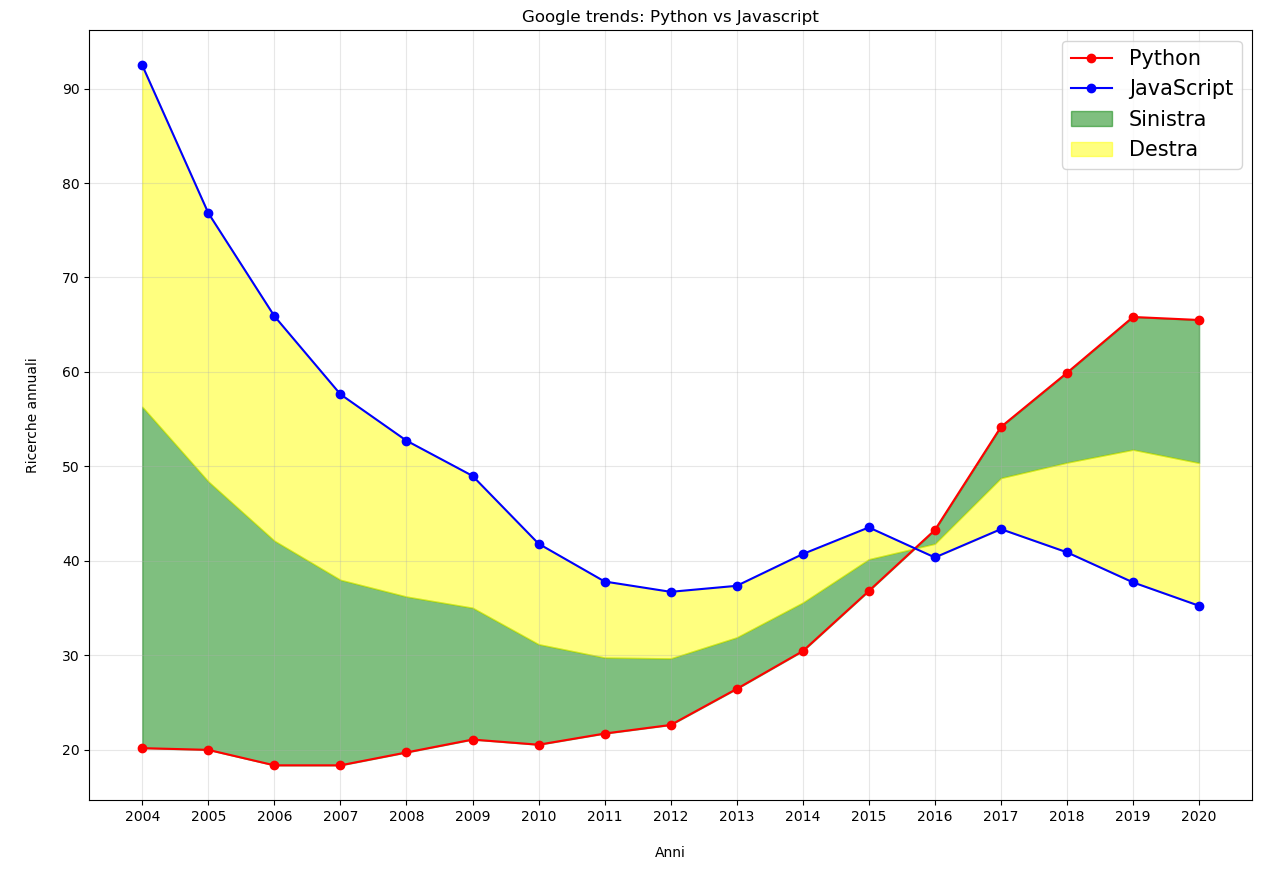

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pyVSjs = pd.read_csv(r"C:\Users\chrin\Desktop\Visualizzazione\Dataset\google-trends-2004-2020.csv")

# Estrai i dati da CSV
python_values = pyVSjs['Python']
js_values = pyVSjs['JavaScript']
py_years_values = {}
js_years_values = {}

for i in pyVSjs.index:
    date = pyVSjs['Week'][i]
    date_splitted = date.split('-')
    year = date_splitted[0]

    # Python
    if year in py_years_values:
        py_years_values[year].append(pyVSjs['Python'][i])
    else:
        py_years_values[year] = []

    # JavaScript
    if year in js_years_values:
        js_years_values[year].append(pyVSjs['JavaScript'][i])
    else:
        js_years_values[year] = []

# Calcola le medie annuali
py_mean = [np.mean(py_years_values[year]) for year in py_years_values]
js_mean = [np.mean(js_years_values[year]) for year in js_years_values]

# Plot delle medie annuali
plt.figure(figsize=(15, 10))
plt.plot(py_years_values.keys(), py_mean, linestyle='-', color='r', label='Python', marker='o')
plt.plot(js_years_values.keys(), js_mean, linestyle='-', color='b', label='JavaScript', marker='o')

# Trova il punto medio tra le due linee
midpoint = [(py + js) / 2 for py, js in zip(py_mean, js_mean)]

# Colora l'area a sinistra del punto medio
plt.fill_between(py_years_values.keys(), py_mean, midpoint, color='green', alpha=0.5, label='Sinistra')

# Colora l'area a destra del punto medio
plt.fill_between(py_years_values.keys(), js_mean, midpoint, color='yellow', alpha=0.5, label='Destra')

plt.legend(fontsize=15)
plt.title('Google trends: Python vs Javascript')
plt.xlabel('\nAnni\n')
plt.ylabel('\nRicerche annuali\n')
plt.grid(alpha=0.3)

plt.show()


[]


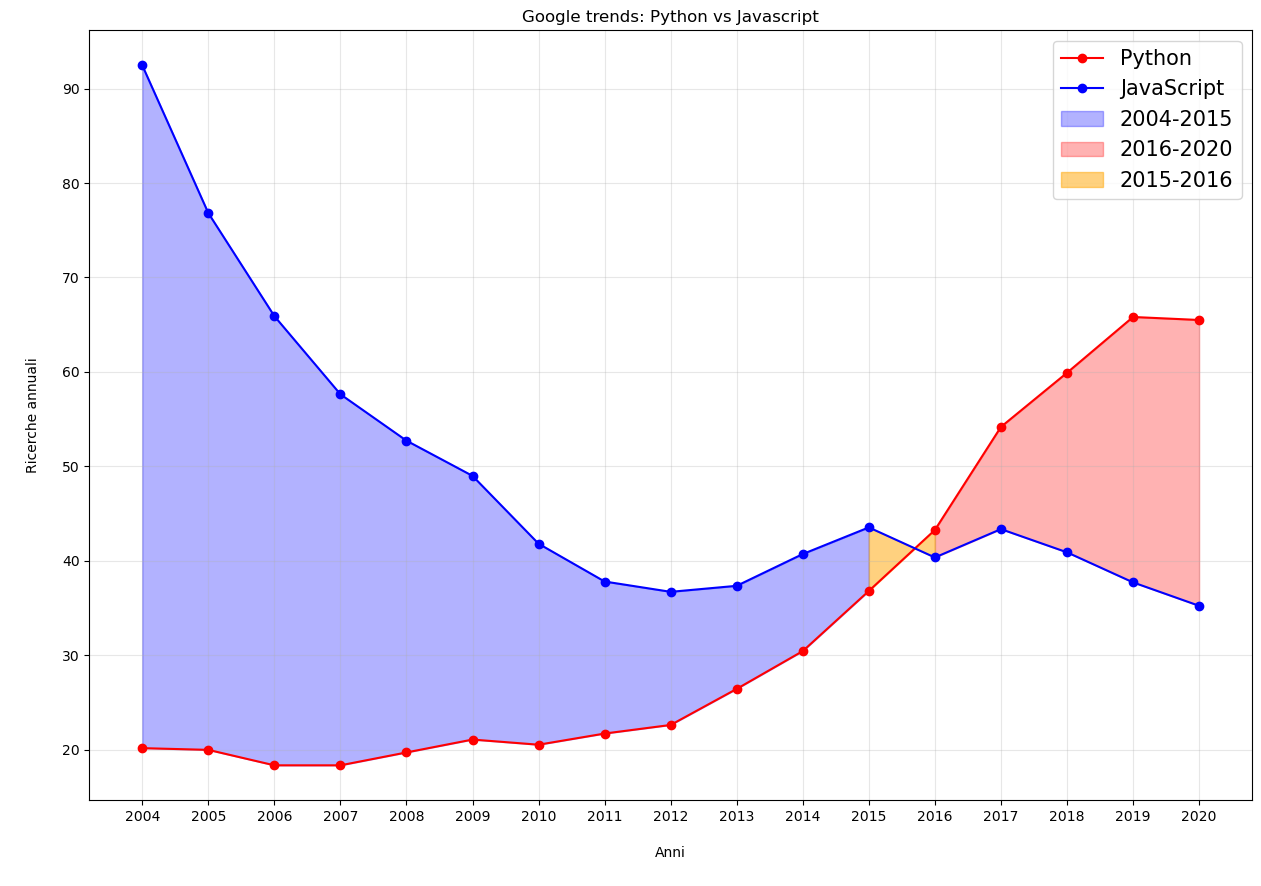

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pyVSjs = pd.read_csv(r"C:\Users\chrin\Desktop\Visualizzazione\Dataset\google-trends-2004-2020.csv")

# Estrai i dati da CSV
python_values = pyVSjs['Python']
js_values = pyVSjs['JavaScript']
py_years_values = {}
js_years_values = {}

for i in pyVSjs.index:
    date = pyVSjs['Week'][i]
    date_splitted = date.split('-')
    year = date_splitted[0]

    # Python
    if year in py_years_values:
        py_years_values[year].append(pyVSjs['Python'][i])
    else:
        py_years_values[year] = []

    # JavaScript
    if year in js_years_values:
        js_years_values[year].append(pyVSjs['JavaScript'][i])
    else:
        js_years_values[year] = []

# Calcola le medie annuali
py_mean = [np.mean(py_years_values[year]) for year in py_years_values]
js_mean = [np.mean(js_years_values[year]) for year in js_years_values]

# Intersezione linee
intersection_indices = np.where(np.array(py_mean) == np.array(js_mean))
print(intersection_indices[0])

# Plot delle medie annuali
plt.figure(figsize=(15, 10))
plt.plot(py_years_values.keys(), py_mean, linestyle='-', color='r', label='Python', marker='o')
plt.plot(js_years_values.keys(), js_mean, linestyle='-', color='b', label='JavaScript', marker='o')

# Trova il punto medio tra le due linee
midpoint = [(py + js) / 2 for py, js in zip(py_mean, js_mean)]

# Colora l'area a sinistra del punto medio in verde
plt.fill_between(py_years_values.keys(), py_mean, js_mean, where=np.array(py_mean) <= np.array(js_mean), color='b', alpha=0.3, label='2004-2015')

# Colora l'area a destra del punto medio in giallo
plt.fill_between(py_years_values.keys(), py_mean, js_mean, where=np.array(py_mean) > np.array(js_mean), color='red', alpha=0.3, label='2016-2020')

# Colora l'area tra Python e JavaScript per gli anni 2015-2016 in arancione
plt.fill_between(py_years_values.keys(), py_mean, js_mean, where=(np.array(list(py_years_values.keys())) >= '2015') & (np.array(list(py_years_values.keys())) <= '2016'), color='orange', alpha=0.5, label='2015-2016')

plt.legend(fontsize=15)
plt.title('Google trends: Python vs Javascript')
plt.xlabel('\nAnni\n')
plt.ylabel('\nRicerche annuali\n')
plt.grid(alpha=0.3)

plt.show()


Index(['Unnamed: 0', 'week', 'analytics', 'api', 'artificial intelligence',
       'big data', 'clustering', 'data mining', 'data science',
       'data scientist', 'data warehouse', 'deep learning', 'etl', 'excel',
       'github', 'hadoop', 'iot', 'java', 'machine learning', 'matlab',
       'minitab', 'modeling', 'python', 'R', 'regression', 'sql',
       'statistician'],
      dtype='object')


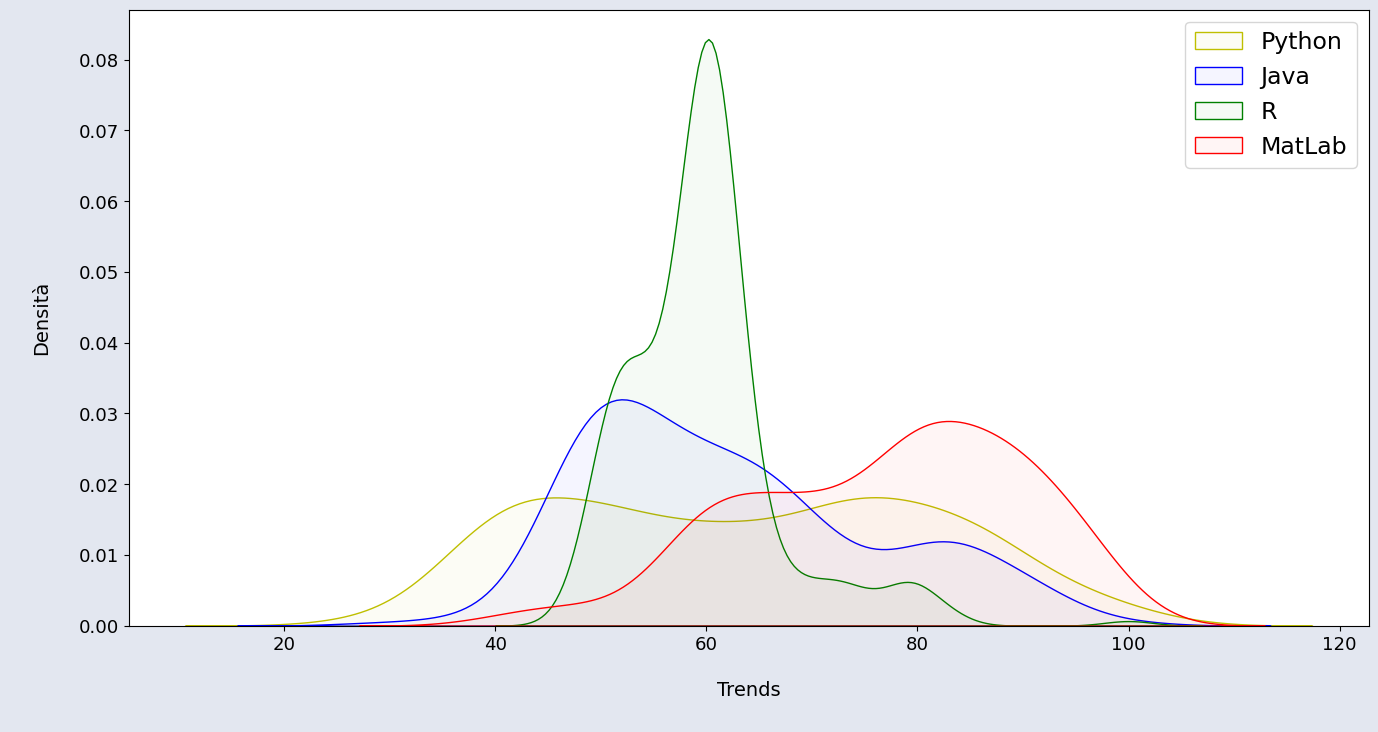

" plt.figure(figsize=(15,8))\nplt.subplot(221)\nsns.kdeplot(py,color='r',fill=True,label='Python')\nplt.legend()\n\nplt.subplot(222)\nsns.kdeplot(java,color='g',fill=True,label='Java')\nplt.legend()\n\nplt.subplot(223)\nsns.kdeplot(r,color='b',fill=True,label='R')\nplt.legend()\n\nplt.subplot(224)\nsns.kdeplot(matlab,color='y',fill=True,label='MatLab')\nplt.legend() "

In [23]:
#data = pd.read_csv(r"C:\Users\chris\OneDrive\Desktop\Visualizzazione\Dataset\data.csv")
data = pd.read_csv(r"C:\Users\chrin\Desktop\Visualizzazione\Dataset\data.csv")

print(data.columns)

py = data['python']
java = data['java']
r = data['R']
matlab = data['matlab']
 
fig = plt.figure(figsize=(16,8))
fig.set_facecolor('#e3e7f0')
sns.kdeplot(py,color='y',fill=True,label='Python',alpha=0.04)
sns.kdeplot(java,color='b',fill=True,label='Java',alpha=0.04)
sns.kdeplot(r,color='g',fill=True,label='R',alpha=0.04)
sns.kdeplot(matlab,color='r',fill=True,label='MatLab',alpha=0.04)
plt.xlabel('\nTrends\n',fontsize=14)
plt.ylabel('\nDensità\n',fontsize=14)
plt.legend(fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

""" plt.figure(figsize=(15,8))
plt.subplot(221)
sns.kdeplot(py,color='r',fill=True,label='Python')
plt.legend()

plt.subplot(222)
sns.kdeplot(java,color='g',fill=True,label='Java')
plt.legend()

plt.subplot(223)
sns.kdeplot(r,color='b',fill=True,label='R')
plt.legend()

plt.subplot(224)
sns.kdeplot(matlab,color='y',fill=True,label='MatLab')
plt.legend() """

Index(['Unnamed: 0', 'week', 'analytics', 'api', 'artificial intelligence',
       'big data', 'clustering', 'data mining', 'data science',
       'data scientist', 'data warehouse', 'deep learning', 'etl', 'excel',
       'github', 'hadoop', 'iot', 'java', 'machine learning', 'matlab',
       'minitab', 'modeling', 'python', 'R', 'regression', 'sql',
       'statistician'],
      dtype='object')
100 100 100 100


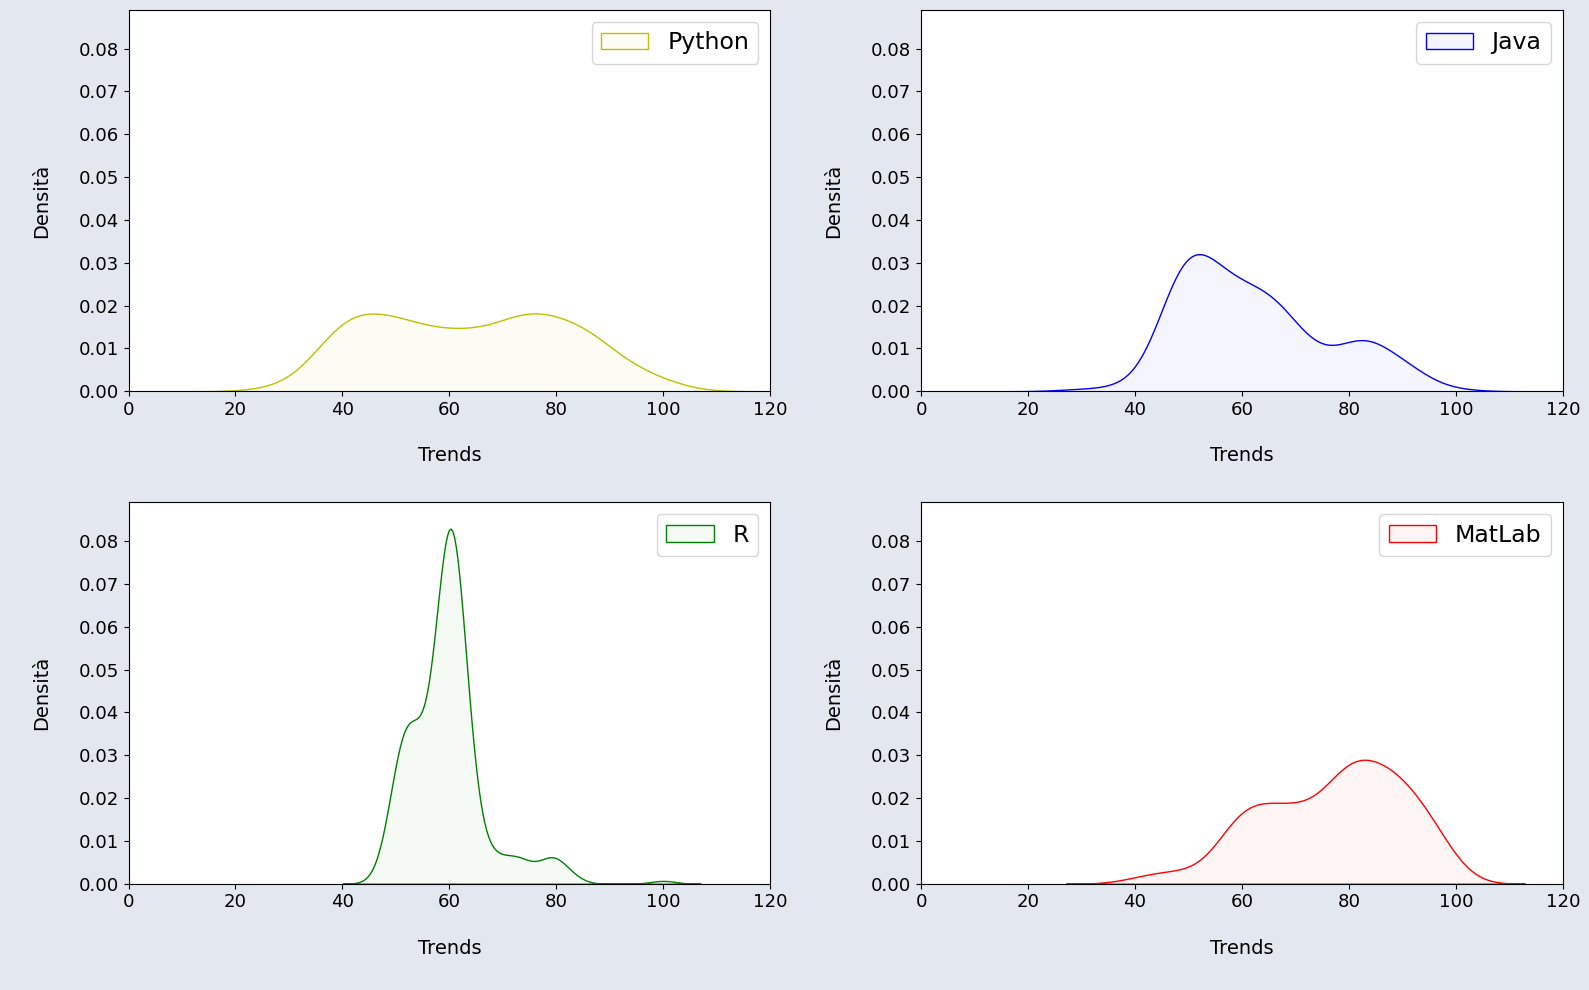

In [24]:
#heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(data.columns)

""" py = data['python'] / len(data['python'])
java = data['java'] / len(data['java'])
r = data['R'] / len(data['R'])
matlab = data['matlab'] / len(data['matlab']) """

py = data['python']
java = data['java']
r = data['R']
matlab = data['matlab']



# Imposta i limiti degli assi basati sui dati
print(max(py), max(java), max(r), max(matlab))
x_limit = 120
y_limit = 0.089

fig = plt.figure(figsize=(16,10))
fig.set_facecolor('#e3e7f0')

plt.subplot(221)
sns.kdeplot(py, color='y', fill=True, alpha=0.04, label='Python')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.xlabel('\nTrends\n',fontsize=14)
plt.ylabel('\nDensità\n',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=17)

plt.subplot(222)
sns.kdeplot(java, color='b', fill=True, alpha=0.04, label='Java')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.xlabel('\nTrends\n',fontsize=14)
plt.ylabel('\nDensità\n',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=17)

plt.subplot(223)
sns.kdeplot(r, color='g', fill=True,alpha=0.04, label='R')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.xlabel('\nTrends\n',fontsize=14)
plt.ylabel('\nDensità\n',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=17)

plt.subplot(224)
sns.kdeplot(matlab, color='r', fill=True, alpha=0.04, label='MatLab')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.xlabel('\nTrends\n',fontsize=14)
plt.ylabel('\nDensità\n',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=17)

plt.tight_layout()
plt.show()


Index(['Unnamed: 0', 'week', 'analytics', 'api', 'artificial intelligence',
       'big data', 'clustering', 'data mining', 'data science',
       'data scientist', 'data warehouse', 'deep learning', 'etl', 'excel',
       'github', 'hadoop', 'iot', 'java', 'machine learning', 'matlab',
       'minitab', 'modeling', 'python', 'R', 'regression', 'sql',
       'statistician'],
      dtype='object')
100 100 100 100


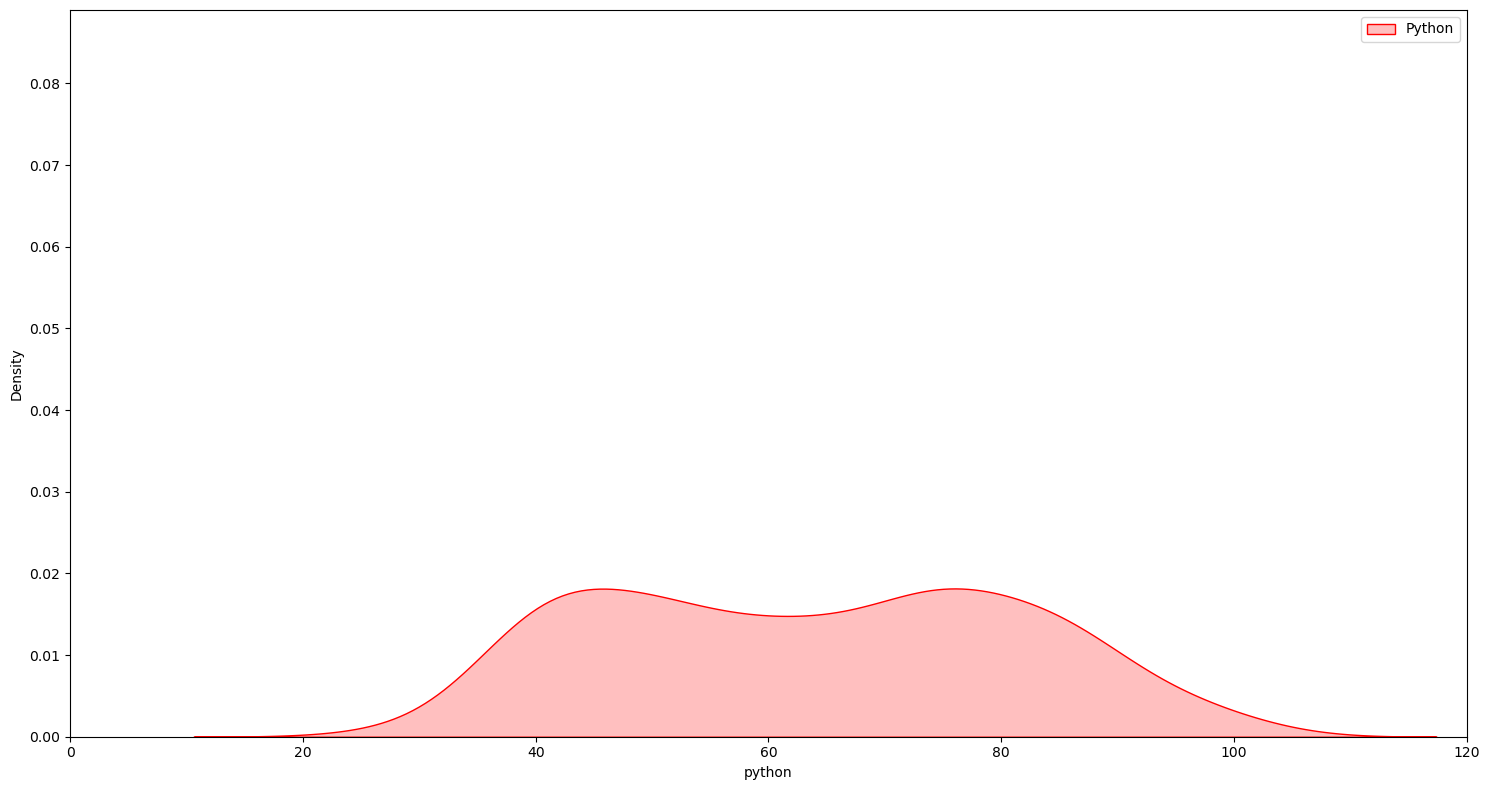

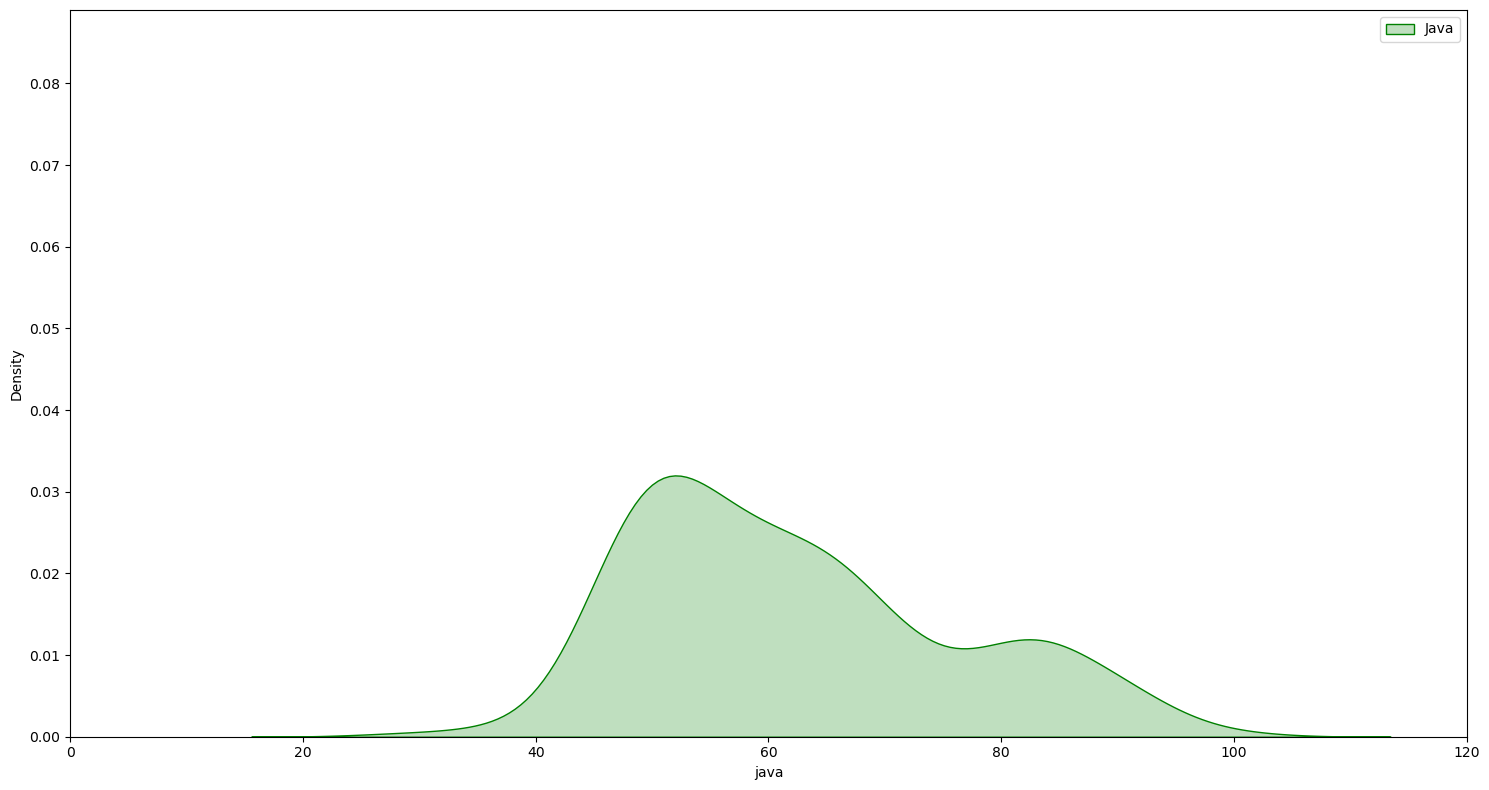

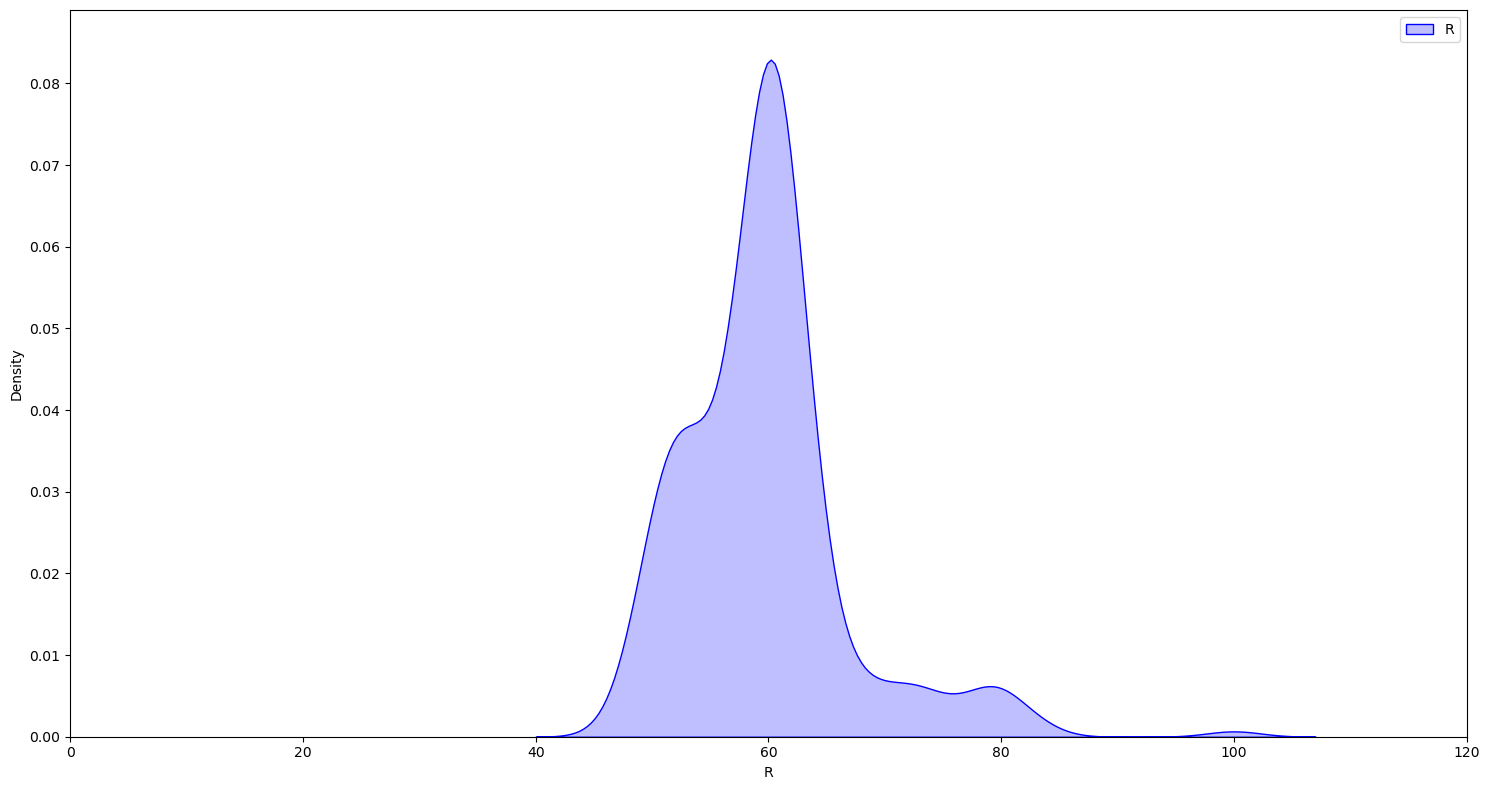

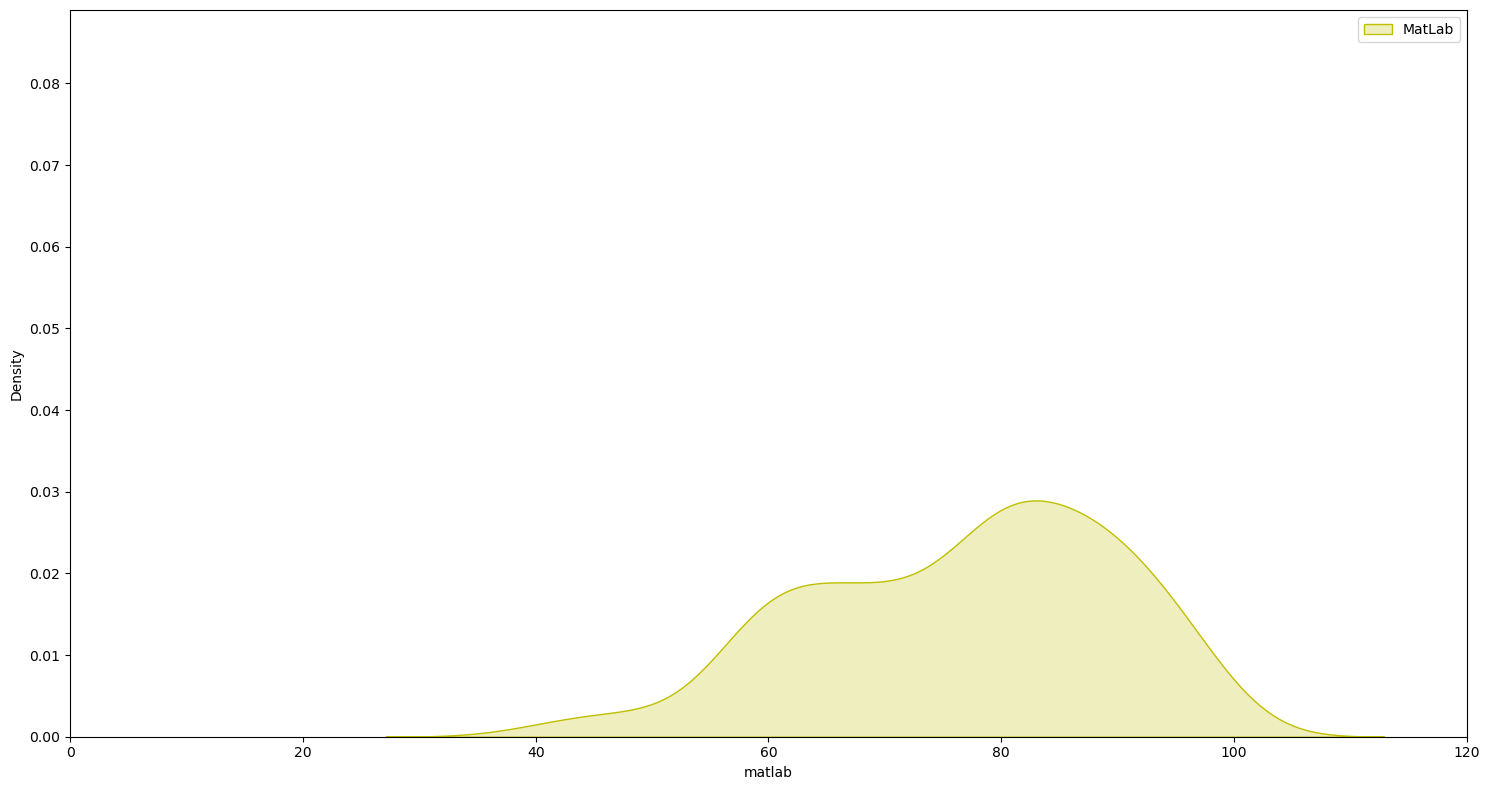

In [25]:
#heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(data.columns)

""" py = data['python'] / len(data['python'])
java = data['java'] / len(data['java'])
r = data['R'] / len(data['R'])
matlab = data['matlab'] / len(data['matlab']) """

py = data['python']
java = data['java']
r = data['R']
matlab = data['matlab']



# Imposta i limiti degli assi basati sui dati
print(max(py), max(java), max(r), max(matlab))
x_limit = 120
y_limit = 0.089

plt.figure(figsize=(15, 8))

sns.kdeplot(py, color='r', fill=True, label='Python')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.kdeplot(java, color='g', fill=True, label='Java')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.kdeplot(r, color='b', fill=True, label='R')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.kdeplot(matlab, color='y', fill=True, label='MatLab')
plt.xlim(0, x_limit)
plt.ylim(0, y_limit)
plt.legend()
plt.tight_layout()
plt.show()
